In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # color stuff
from scipy.optimize import curve_fit
%matplotlib inline

def pltDefaultPar():
    #reset default matplotlib parameters for this notebook
    plt.rcParams.update({'font.size': 20})
    plt.rcParams['lines.linewidth'] = 1
    plt.rcParams['lines.markersize'] = 6
    
def pltPrintPar():
    plt.rcParams.update({'font.size': 15})
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 8

rootTP="/home/johann/Remote/imac"
rootMAC="/Users/jh"
root=rootMAC

In [2]:
def plotdataArr(dataArray,xlabel,lineArr,lineParam='',title='',linestyles='',setlog='',legendloc='upper center'):
    # color stuff: http://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib
    pltPrintPar()
    colors=cm.rainbow(np.linspace(0,1,len(dataArray)))
    if linestyles=='': lslist = len(dataArray) * ['o-']
    else: lslist = linestyles
    plt.figure(figsize=(7,5))
    for i, line in enumerate(dataArray):
        ti = lineParam + ' = ' + str(lineArr[i])
        xs = line[:,0]
        dd0s = line[:,1]/6.
        plt.plot(xs,dd0s,lslist[i],label=ti,c=colors[i])
    plt.xlabel(r'$'+xlabel+'$')
    plt.ylabel(r'$D/D_0$')
    plt.ylim([0,1.3])
    plt.title(title)
    plt.legend(loc=legendloc, bbox_to_anchor=(0.5, 1.2),
          ncol=3)
    if setlog=='y' or setlog=="double":
        plt.yscale('log')
    if setlog=='x' or setlog=="double":
        plt.xscale('log')
    plt.show()
        

# Compare D over p for Ranb and SPSnoHI

In [4]:
triggerArr = ['normal','gamma','gamma2','ranRod/nrods1']
triggerNameArr = []
U=0
a=0# This if fixed here, for no HI
datadir= root + "/Documents/workspace-cpp"
afrac = '%g'%(float(a)/10)
dataArr=[]
for trigger in triggerArr:
    if trigger == 'normal':
        typedir='/SingleParticleSimulation/sim_dataOLD/noreset/dt0.0001/t200/d0/b10/'
        MSD=''
    elif trigger == 'ranRod/nrods1':
        typedir='/SingleParticleSimulation/Release/sim_data/noreset/'+trigger+'/dt0.0005/t200/d0/b10'
        MSD='MSD'
    else:
        typedir='/RanbSPS/Release/sim_data/'+trigger+'/dt0.0005/t200'
        MSD='MSD'
    triggerNameArr.append(trigger.replace('/',''))
    folder=datadir + typedir
    data = []
    for pdir in os.listdir(folder):
        file=os.path.join(folder, pdir,'k1.000/u0/InstantValues/linear_fit_parameters'+str(MSD)+'.txt')
        if os.path.isfile(file):
            p=file.split('/p')[1].split('/k')[0] # assign value from dir to p
            p='%g'%(float(p)/10)                 # make p value p/b
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(p)+a/10.,float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
    dataArr.append(np.array(sorted(data)))
u0data = (dataArr)

### TODO more data on sheldon

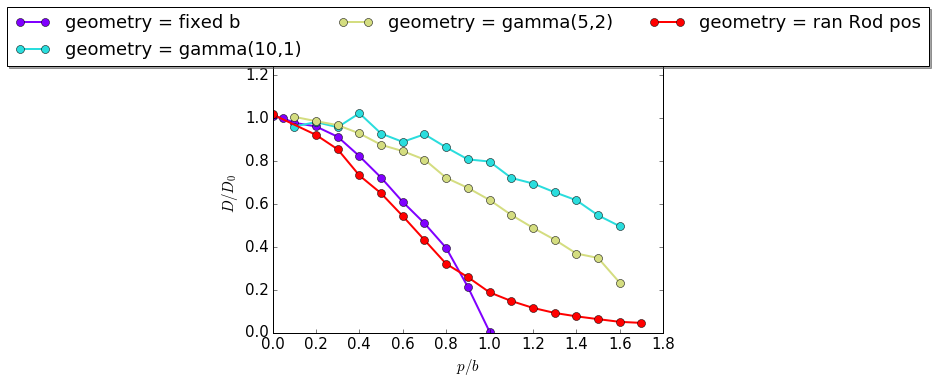

In [5]:
u0data[1],u0data[2] = u0data[2],u0data[1]
triggerNameArr = ['fixed b','gamma(10,1)','gamma(5,2)','ran Rod pos']
plotdataArr(u0data,r'p/b',lineArr=triggerNameArr,lineParam='geometry')

# Test gamma distribution

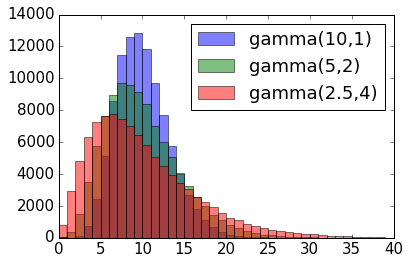

In [42]:
gammab1 = [np.random.gamma(10,1) for x in range(10**5)]
gammab2 = [np.random.gamma(5,2) for x in range(10**5)]
gammab4 = [np.random.gamma(2.5,4) for x in range(10**5)]
plt.hist(gammab1,bins=range(40),alpha=0.5,label="gamma(10,1)")
plt.hist(gammab2,bins=range(40),alpha=0.5,label="gamma(5,2)")
plt.hist(gammab4,bins=range(40),alpha=0.5,label="gamma(2.5,4)")
plt.legend()
plt.show()
bsP=[]
nzeros=0

In [ ]:
# TEST boost::gamma_distribution
gammafile = "/Users/jh/Documents/workspace-cpp/RanbSPS/Release/tmp_gamma.txt"
bs = []
with open(gammafile, 'r') as f:
    bs= f.readlines()
bs = [float(b.strip('\n')) for b in bs]
bs = np.asarray(bs)
plt.hist(bs,bins=range(40))

# Test if it is feasable to combine Ranb and ranRod

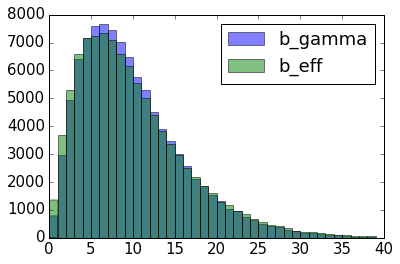

10.0074118448
10.0073452971


In [43]:
def gammab():
    return np.random.gamma(2.5,4)

bs_gamma = []
bs_eff = []
b_prev = 0
rodpos_prev = 0
for i in range(100000):
    newb = gammab()
    rodpos = np.random.uniform() * newb
    b_eff = b_prev - rodpos_prev + rodpos
    bs_gamma.append(newb)
    bs_eff.append(b_eff)
    b_prev = newb
    rodpos_prev = rodpos
plt.hist(bs_gamma,bins=range(40),alpha=0.5,label='b_gamma')
plt.hist(bs_eff,bins=range(40),alpha=0.5,label='b_eff')
plt.legend()
plt.show()
print(np.asarray(bs_gamma).mean())
print(np.asarray(bs_eff).mean())

In [25]:
def readTracerData(k,p,u,trigger='gamma'):
    tracerdata = []
    posfile = root+'/Documents/workspace-cpp/RanbSPS/Release/sim_data/'+trigger
    posfile += '/dt0.0005/t200/p'+str(p)+'/k'+str(k)+'/u'+str(u)+'/Coordinates/trajectory.txt'
    with open(posfile, 'r') as f:
        for i, line in enumerate(f):
            lines = line.split()
            tracerdata.append(lines)
    return  (np.asarray(tracerdata)).astype(float)

In [27]:
k='1.000';u=0;
p=10
tracerdat = readTracerData(k,p,u)

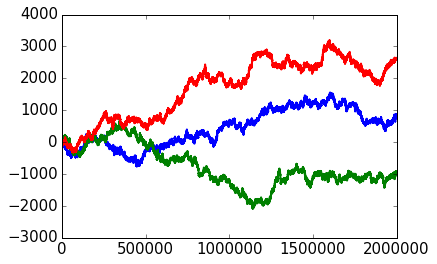

In [35]:
t = tracerdat[:,0]
plt.plot(t,tracerdat[:,1],t,tracerdat[:,2],t,tracerdat[:,3])